# Assignment #2 

## **Yazeed Hamdan** - 1201133 - Section 2

## Part #1

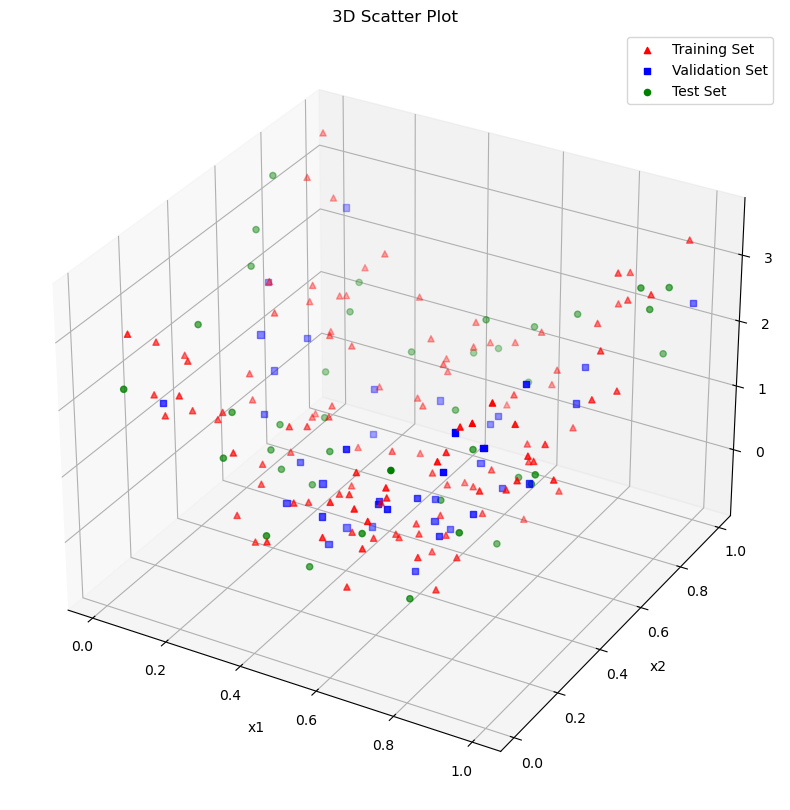

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
###########################################
# Yazeed Hamdan 1201133 
# Section 2 
###########################################
# Part 1 
file_path = 'data_reg.csv'
data_reg = pd.read_csv(file_path) # Loading the dataset from a Data CSV file
# Splitting the dataset
train_data = data_reg.iloc[:120] # The first 120 rows  for training
validation_data = data_reg.iloc[120:160] # Rows from 120 to 160 for validation
test_data = data_reg.iloc[160:] # Rows after 160 for testing
# Separating features and target labels for each dataset

X_train = train_data[['x1', 'x2']]
y_train = train_data['y']
#####
X_validation = validation_data[['x1', 'x2']]
y_validation = validation_data['y']
####
X_test = test_data[['x1', 'x2']]
y_test = test_data['y']
#####

fig = plt.figure(figsize=(10, 10)) # 3D scatter plot
sccpl = fig.add_subplot(111, projection='3d') # Adding a subplot with 3D projection
# Plotting training data 
sccpl.scatter(X_train['x1'], X_train['x2'], y_train, marker='^',color='red', label='Training Set')
# Plotting validation data
sccpl.scatter(X_validation['x1'], X_validation['x2'], y_validation, marker='s', color='blue', label='Validation Set')
# Plotting test data 
sccpl.scatter(X_test['x1'], X_test['x2'], y_test, marker='o', color='green', label='Test Set')
# Setting plot title and labels
plt.title('3D Scatter Plot')
sccpl.set_xlabel('x1')
sccpl.set_ylabel('x2')
sccpl.set_zlabel('Y')
sccpl.legend()
plt.show()


  After read the dataset from a CSV file and splits it into three parts: a training set (the first 120 examples) 
   a validation set (the next 40 examples)
   and a test set (the last 40 examples).

  3D scatter plot was created where the different sets are visualized with uniqe shapes and colors. The plot represent the two features and the target label, giving a spatial representation of how the data points are distributed across the three-dimensional space. 
 The result  helpes to understand the relationships and distribution among the features and label.
 
 
 
 






## Part #2

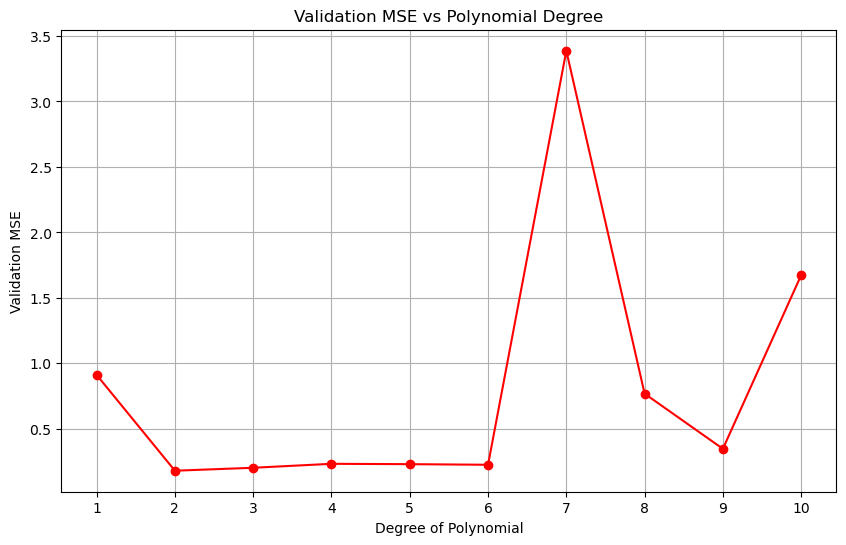

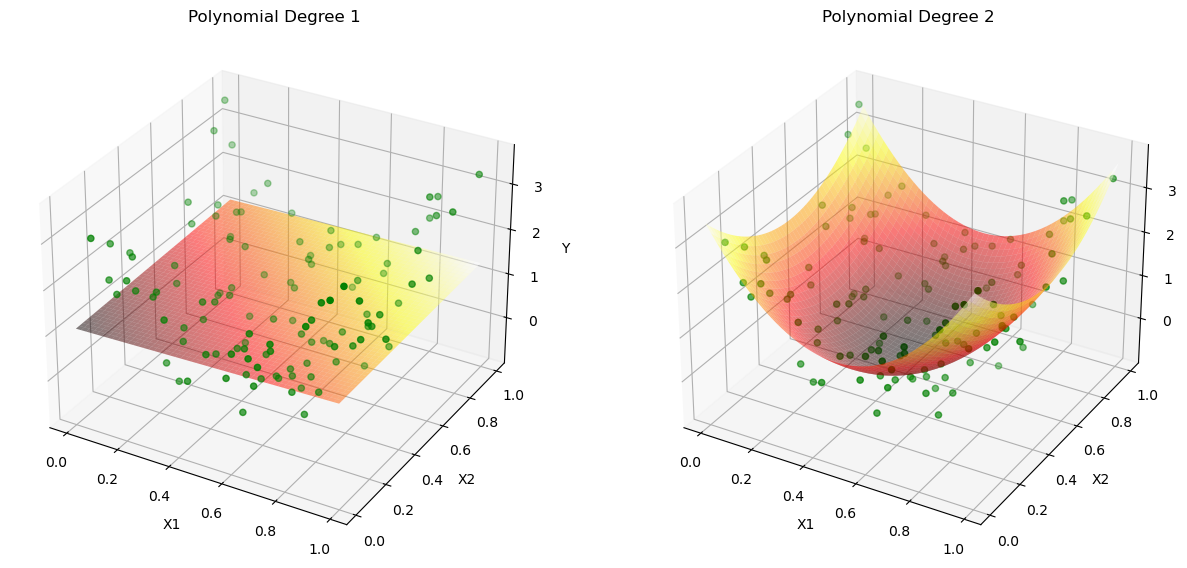

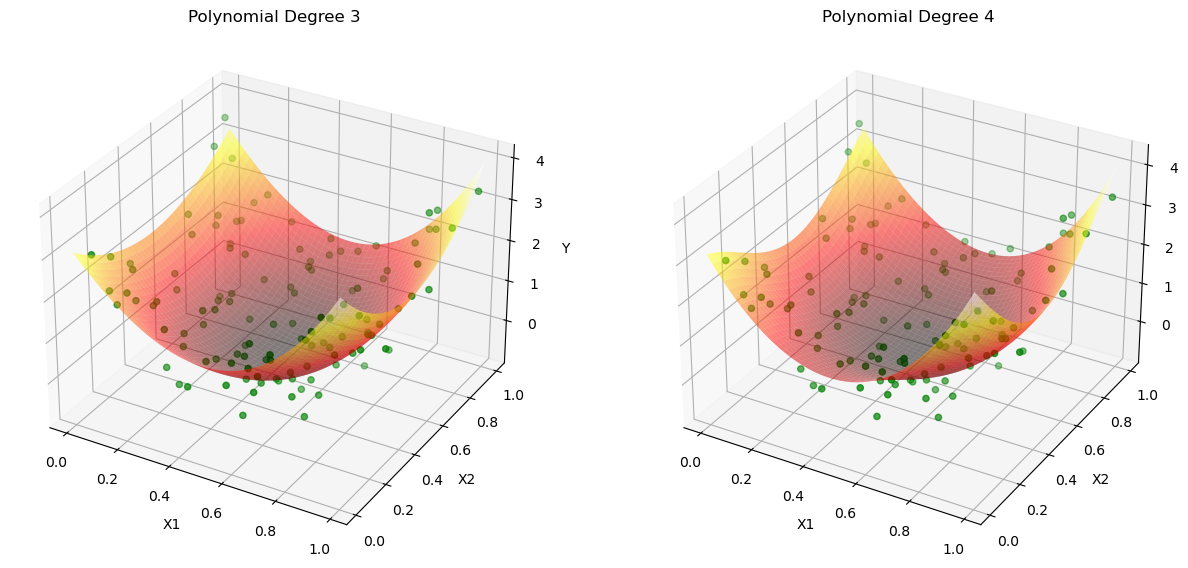

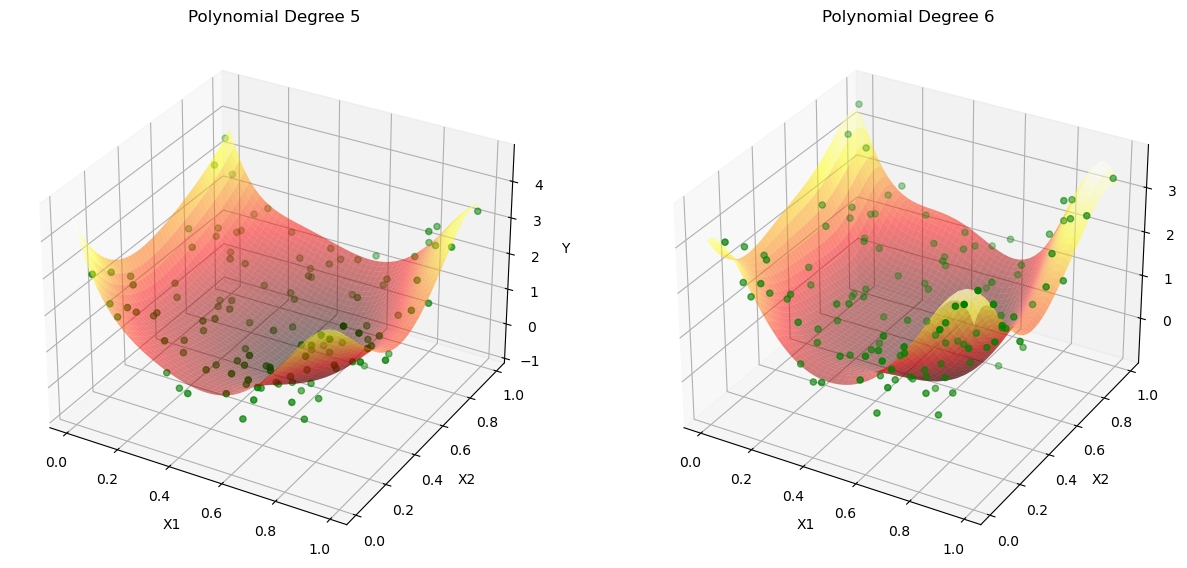

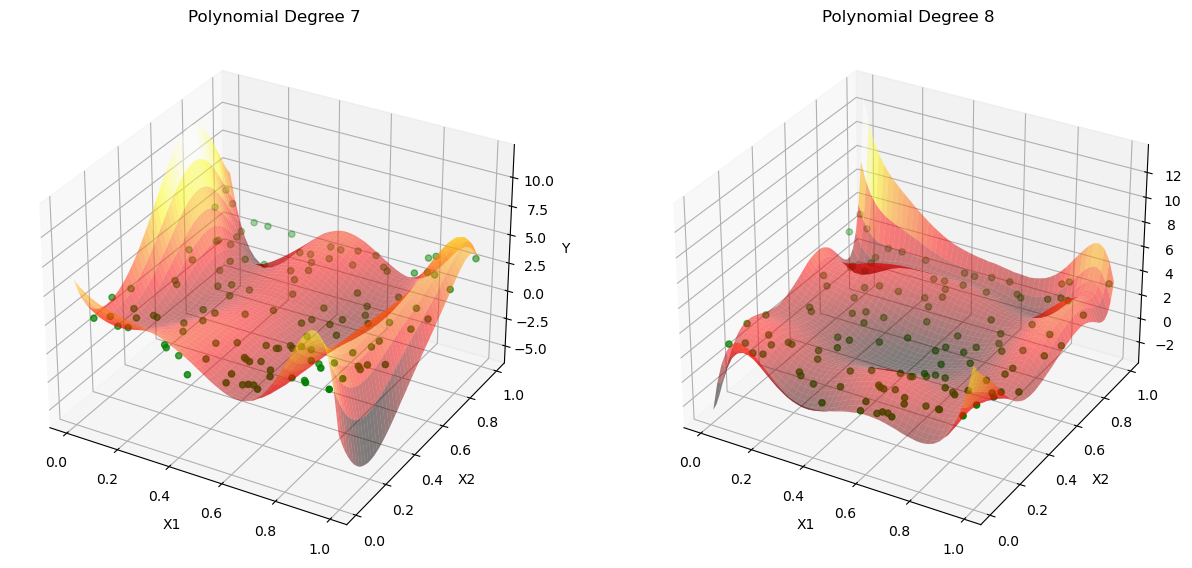

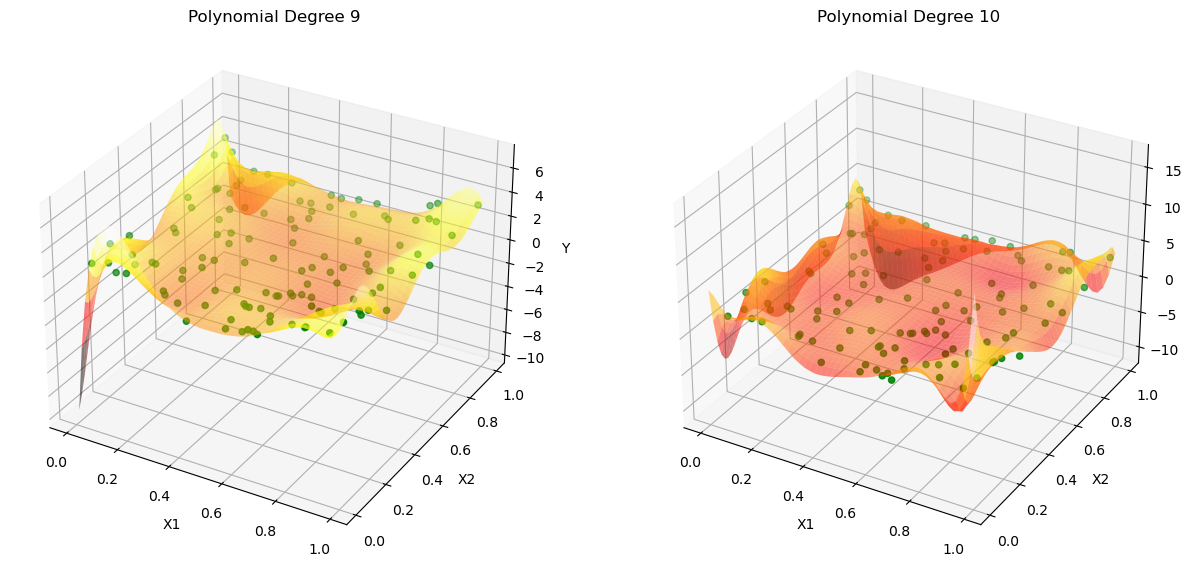

Optimal (Best) Polynomial Degree: 2
Lowest Validation Error: 0.17990349576391856


In [2]:
# Part 2

# Initialize lists to store model information and validation errors
poly_degrees = range(1, 11)
val_errors = []
reg_models = []

# train a polynomial regression model for each degree in the specified range
for degree in poly_degrees:
    # transform the training features into polynomial features for the current degree
    poly_transformer = PolynomialFeatures(degree=degree)
    features_train_poly = poly_transformer.fit_transform(X_train)
    features_val_poly = poly_transformer.transform(X_validation)

    # fit a linear regression model using the polynomial features
    reg_model = LinearRegression()
    reg_model.fit(features_train_poly, y_train)
    reg_models.append(reg_model)  # store the trained model

    # use the model to predict the validation set and calculate the mean squared error
    pred_val = reg_model.predict(features_val_poly)
    error = mean_squared_error(y_validation, pred_val)
    val_errors.append(error)  # store the validation error

# plot the validation errors as a function of polynomial degree to find the best model
plt.figure(figsize=(10, 6))
plt.plot(poly_degrees, val_errors, marker='o', color='red')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Validation MSE')
plt.title('Validation MSE vs Polynomial Degree')
plt.xticks(poly_degrees)
plt.grid(True)
plt.show() 

#function to plot the 3D surface for the polynomial model
def plot_poly_model(X, y, model, poly_degree, axis):
    # create a mesh grid for plotting the surface
    x1_range = np.linspace(X['x1'].min(), X['x1'].max(), 50)
    x2_range = np.linspace(X['x2'].min(), X['x2'].max(), 50)
    x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
    grid = np.c_[x1_grid.ravel(), x2_grid.ravel()]

    poly_transformer = PolynomialFeatures(degree=poly_degree)    # transform the mesh grid into polynomial features
    grid_poly = poly_transformer.fit_transform(grid)

    predictions = model.predict(grid_poly).reshape(x1_grid.shape)  # predict the output for each point on the grid

    # plot the surface based on the model's predictions
    axis.plot_surface(x1_grid, x2_grid, predictions, alpha=0.5, cmap='hot')
    # scatter plot of the  training data
    axis.scatter(X['x1'], X['x2'], y, color='green')
    axis.set_xlabel('X1')
    axis.set_ylabel('X2')
    axis.set_zlabel('Y')
    axis.set_title(f'Degree {poly_degree}')  

# plot the surfaces of the polynomial models
for i in range(0, len(poly_degrees), 2):
    fig, axes = plt.subplots(1, 2, figsize=(15, 10), subplot_kw={'projection': '3d'})
    
    for j in range(2):
        if i+j < len(poly_degrees):
            plot_poly_model(X_train, y_train, reg_models[i+j], poly_degrees[i+j], axes[j])
            axes[j].set_title(f'Polynomial Degree {poly_degrees[i+j]}')  #  title for each subplot
    plt.show()

# determine the polynomial degree with the lowest validation error
optimal_degree = poly_degrees[val_errors.index(min(val_errors))]
print("Optimal (Best) Polynomial Degree:", optimal_degree)
print("Lowest Validation Error:", min(val_errors))



Models from degree 1 to 10 was evaluated. For each model, the Mean Squared Error on a validation set was calculated to find model accuracy, with lower MSE indicating a better fit.
The Validation MSE VS Polynomial degree was plotted, and each model's predictions are visualized as a 3D surface over the training data.

 The optimal model is identified as the one with the lowest MSE, which is noticed to be the model with degree 2.
 The validation MSE in degree 2 = 0.17990349576391856, as shown in the output.


## Part #3 (plot the MSE on the validation vs the regularization parameter.)

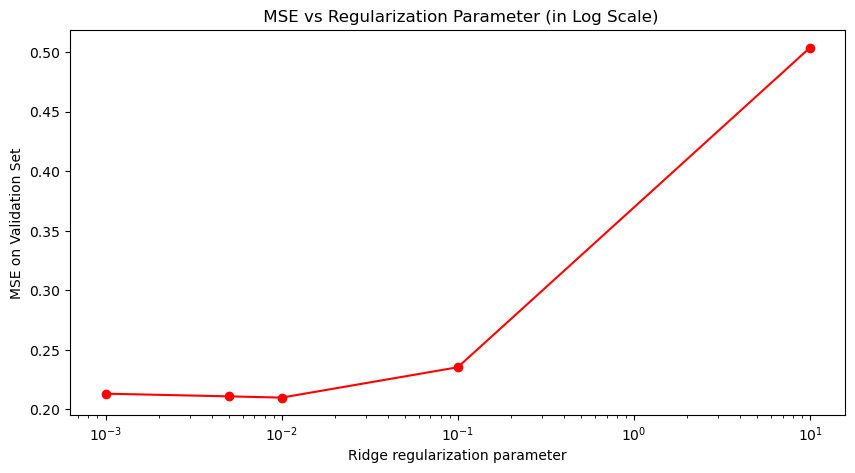

Lowest MSE =  0.20996554038850457
Best regularization parameter is 0.01


In [3]:
# part 3
MSE_List = []
ridge_params = [0.001, 0.005, 0.01, 0.1, 10] # the set of regularization parameters to evaluate
poly_transformer = PolynomialFeatures(degree=8)# polynomial transformation of features to (degree 8)
X_train_transformed = poly_transformer.fit_transform(X_train) # transform training 
X_validation_transformed = poly_transformer.transform(X_validation) # transform validation 

for alpha_value in ridge_params:
    ridge_model = Ridge(alpha=alpha_value) #create a ridge regression model with the current regularization parameter
    ridge_model.fit(X_train_transformed, y_train) # train the model using the transformed training features
    y_pred_validation = ridge_model.predict(X_validation_transformed)  # predict on the transformed validation set using the trained model
    mse = mean_squared_error(y_validation, y_pred_validation) # calculate the Mean Squared Error  on the validation set
    MSE_List.append(mse) #append the calculated MSE to the list

plt.figure(figsize=(10, 5)) # plotting the MSE values for each regularization parameter
plt.plot(ridge_params, MSE_List, marker='o', color='red')
plt.xlabel('Ridge regularization parameter') 
plt.ylabel('MSE on Validation Set') 
plt.title(' MSE vs Regularization Parameter (in Log Scale)')
plt.xscale('log') # set the x axis to logarithmic scale 
plt.show()

best_param = ridge_params[np.argmin(MSE_List)] # finding the best regularization parameter and its corresponding MSE
best_mse = min(MSE_List)
print("Lowest MSE = ", best_mse)
print("Best regularization parameter is", best_param)



  
As shown in the log scale plot above and the printed results, it can be noticed that the best value among the following options: {0.001, 0.005, 0.01, 0.1, 10} is 0.01, because it has less MSE value.

## 1. using the logistic regression implementation of scikit-learn library, Learn a logistic regression model with a linear decision boundary. Draw the decision boundary of the learned model on a scatterplot of the training set (similar to Figure 1). Compute the training and testing accuracy of the learned model.
## 2. Repeat part 1 but now to learn a logistic regression model with quadratic decision boundary.

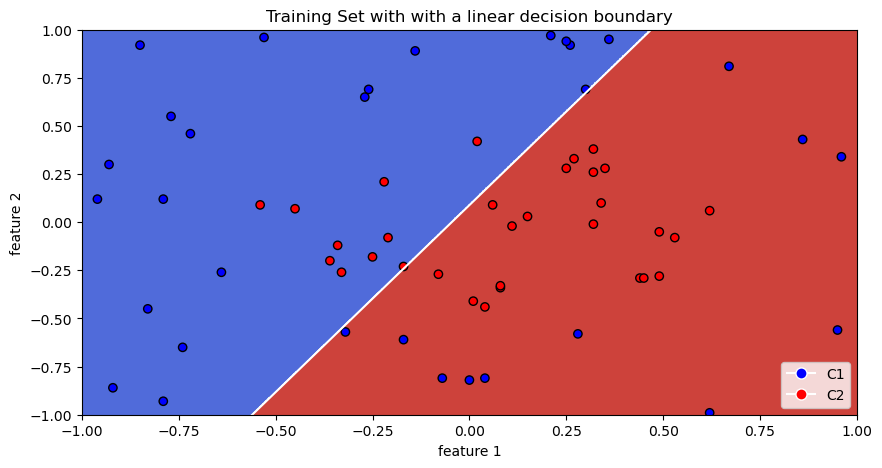

Training Accuracy: 66.13%
Testing Accuracy: 68.18%


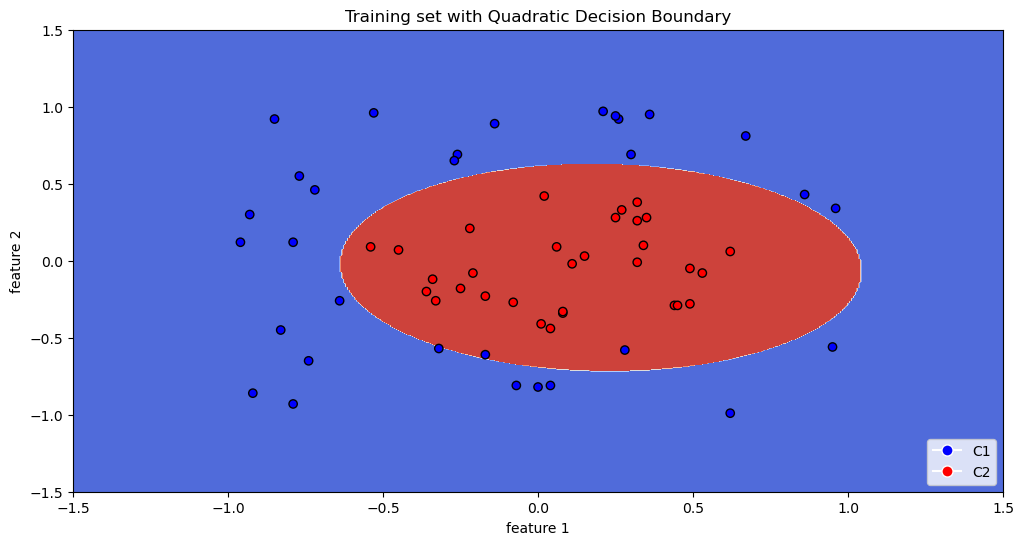

Training Accuracy (Quadratic): 96.77%
Testing Accuracy (Quadratic): 95.45%


In [4]:

test_file_path = 'test_cls.csv'
train_file_path = 'train_cls.csv'

# read the data from the csv files
train_data = pd.read_csv(train_file_path)
test_data = pd.read_csv(test_file_path)
warnings.filterwarnings("ignore", message="X does not have valid feature names", category=UserWarning)
label_encoder = LabelEncoder() # here encode the class labels
y_train_encoded = label_encoder.fit_transform(train_data['class'])
y_test_encoded = label_encoder.transform(test_data['class'])

# define features and labels for the training and the testing
X_train = train_data.drop('class', axis=1)
X_test = test_data.drop('class', axis=1)

# Initialize and fit the Logistic Regression model
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train_encoded)

SQ= logistic_reg.coef_[0] # get the coefficients for the decision boundary
LRI = logistic_reg.intercept_[0]

SLOPE = -SQ[0] / SQ[1] # compute intercept and slope of the decision boundary
inter = -LRI / SQ[1]

x_values = np.linspace(-1, 1, 300) # generate points for the decision boundary line
y_values = SLOPE * x_values + inter 

# Compute accuracies
train_accuracy = logistic_reg.score(X_train, y_train_encoded)
test_accuracy = logistic_reg.score(X_test, y_test_encoded)

# generating a grid of values
X_F, Y_F = np.meshgrid(np.linspace(-1, 1, 500), np.linspace(-1, 1, 500))
grid_for_prediction = pd.DataFrame(np.c_[X_F.ravel(), Y_F.ravel()], columns=X_train.columns)

# predicting on the grid to find out which region each point belongs to
Z = logistic_reg.predict(grid_for_prediction).reshape(X_F.shape)

# plotting the filled contour plot with decision regions
plt.figure(figsize=(10, 5))
plt.contourf(X_F, Y_F, Z, cmap='coolwarm', alpha=1)
plt.scatter(train_data['x1'], train_data['x2'], c=y_train_encoded, cmap='bwr', edgecolors='k') # plotting the scatter plot for the training data
# plotting the decision boundary line
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='C1', markerfacecolor='blue', markersize=8),
    plt.Line2D([0], [0], marker='o', color='w', label='C2', markerfacecolor='red', markersize=8),
  
]
plt.legend(handles=legend_elements, loc='lower right') # Add the custom legend to the plot
plt.plot(x_values, y_values, color='white') # plot the decision boundary line
plt.xlabel('feature 1') 
plt.ylabel('feature 2')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.title('Training Set with with a linear decision boundary')
plt.show()
print(f"Training Accuracy: {train_accuracy*100:.2f}%")
print(f"Testing Accuracy: {test_accuracy*100:.2f}%")

# create polynomial features for the quadratic
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Initialize and fit the Logistic Regression model on polynomial features
logistic_reg_quad = LogisticRegression()
logistic_reg_quad.fit(X_train_poly, y_train_encoded)

# Generate a grid of points to plot the decision boundary
XX_quad, YY_quad = np.meshgrid(np.linspace(-1.5, 1.5, 500), np.linspace(-1.5, 1.5, 500))

# Flatten the grid to pass into the model for predictions
grid_points_quad = poly_features.transform(np.c_[XX_quad.ravel(), YY_quad.ravel()])

# Predict on the grid points to find decision boundary
Z_quad = logistic_reg_quad.predict(grid_points_quad)
Z_quad = Z_quad.reshape(XX_quad.shape)

train_accuracy_quad = logistic_reg_quad.score(X_train_poly, y_train_encoded) # compute accuracies for the polynomial model
test_accuracy_quad = logistic_reg_quad.score(X_test_poly, y_test_encoded)

plt.figure(figsize=(12, 6)) # plotting the decision regions
plt.contourf(XX_quad, YY_quad, Z_quad, cmap='coolwarm', alpha=1)
scatter_quad = plt.scatter(X_train['x1'], X_train['x2'], c=y_train_encoded, cmap='bwr', edgecolors='k') # Plotting the training data points

legend_elements_quad = [
    plt.Line2D([0], [0], marker='o', color='w', label='C1', markerfacecolor='blue', markersize=8),
    plt.Line2D([0], [0], marker='o', color='w', label='C2', markerfacecolor='red', markersize=8)
]

# Adding the custom legend to the plot
plt.legend(handles=legend_elements_quad, loc='lower right')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.title('Training set with Quadratic Decision Boundary')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()

print(f"Training Accuracy (Quadratic): {train_accuracy_quad*100:.2f}%")
print(f"Testing Accuracy (Quadratic): {test_accuracy_quad*100:.2f}%")

As shown in the first plot at linear decision boundary, the model could not separate the two classes from each other correctly, 
the accuracy for training and testing data were calculated and printed as shown above and it can be noticed that the values were moderated and not acceptable. 
For Quadratic Decision Boundary shown in the second plot,  the model separate the two classes successfully in satisfactory way, and the accuracy for training and testing data in quadratic model were calculated and printed, and it can be noticed that the values are Good and acceptable. 

## 3. Comment on the learned models in 1 and 2 in terms of overfitting/underfitting.

From the previous two parts, it can be noticed that the first learned model which is with a linear decision boundary, was performing an underfitting scenario, because the testing accuracy was low (68.18 %). Also, it was noticed that the second learned model with a quadratic decision boundary was doing good performance, because it has a high testing accuracy (95.45 %), which means that the model is performing a good fit scenario.